# Hi This is Aakkash . 
# This is the 6 task which is Prediction using Decision Tree Algorithm

# Let's first download the dataset

In [37]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 10,10
%matplotlib inline

In [38]:
dataset = pd.read_csv('Iris dataset.csv')

# Looking on to the top 10 records in the dataset

In [39]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Lets see some information about the dataset

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that there are no null values(missing values) present in this dataset

In [42]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can see that minimum, maximum , average(mean) values present in the Iris dataset

In [43]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Here the dependent variable(target) is the Species and the independent variable(input) are SepalLengthCm,	SepalWidthCm,	PetalLengthCm	,PetalWidthCm

In [44]:
input_col = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target_col = ['Species']

# Splitting the data

Before splitting the dataset, let's drop the Id field as it's not required

In [45]:
dataset.drop(['Id'],axis=1,inplace=True)

Lets split the data for training and validation

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset[input_col],dataset[target_col],test_size=0.2,random_state=24)

In [47]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
78,6.0,2.9,4.5,1.5
17,5.1,3.5,1.4,0.3
77,6.7,3.0,5.0,1.7
92,5.8,2.6,4.0,1.2
133,6.3,2.8,5.1,1.5
...,...,...,...,...
129,7.2,3.0,5.8,1.6
147,6.5,3.0,5.2,2.0
145,6.7,3.0,5.2,2.3
87,6.3,2.3,4.4,1.3


In [48]:
y_train

,Species
78,Iris-versicolor
17,Iris-setosa
77,Iris-versicolor
92,Iris-versicolor
133,Iris-virginica
...,...
129,Iris-virginica
147,Iris-virginica
145,Iris-virginica
87,Iris-versicolor


# Building a DecisionTree model

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [50]:
model = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now lets visualize the model graphically

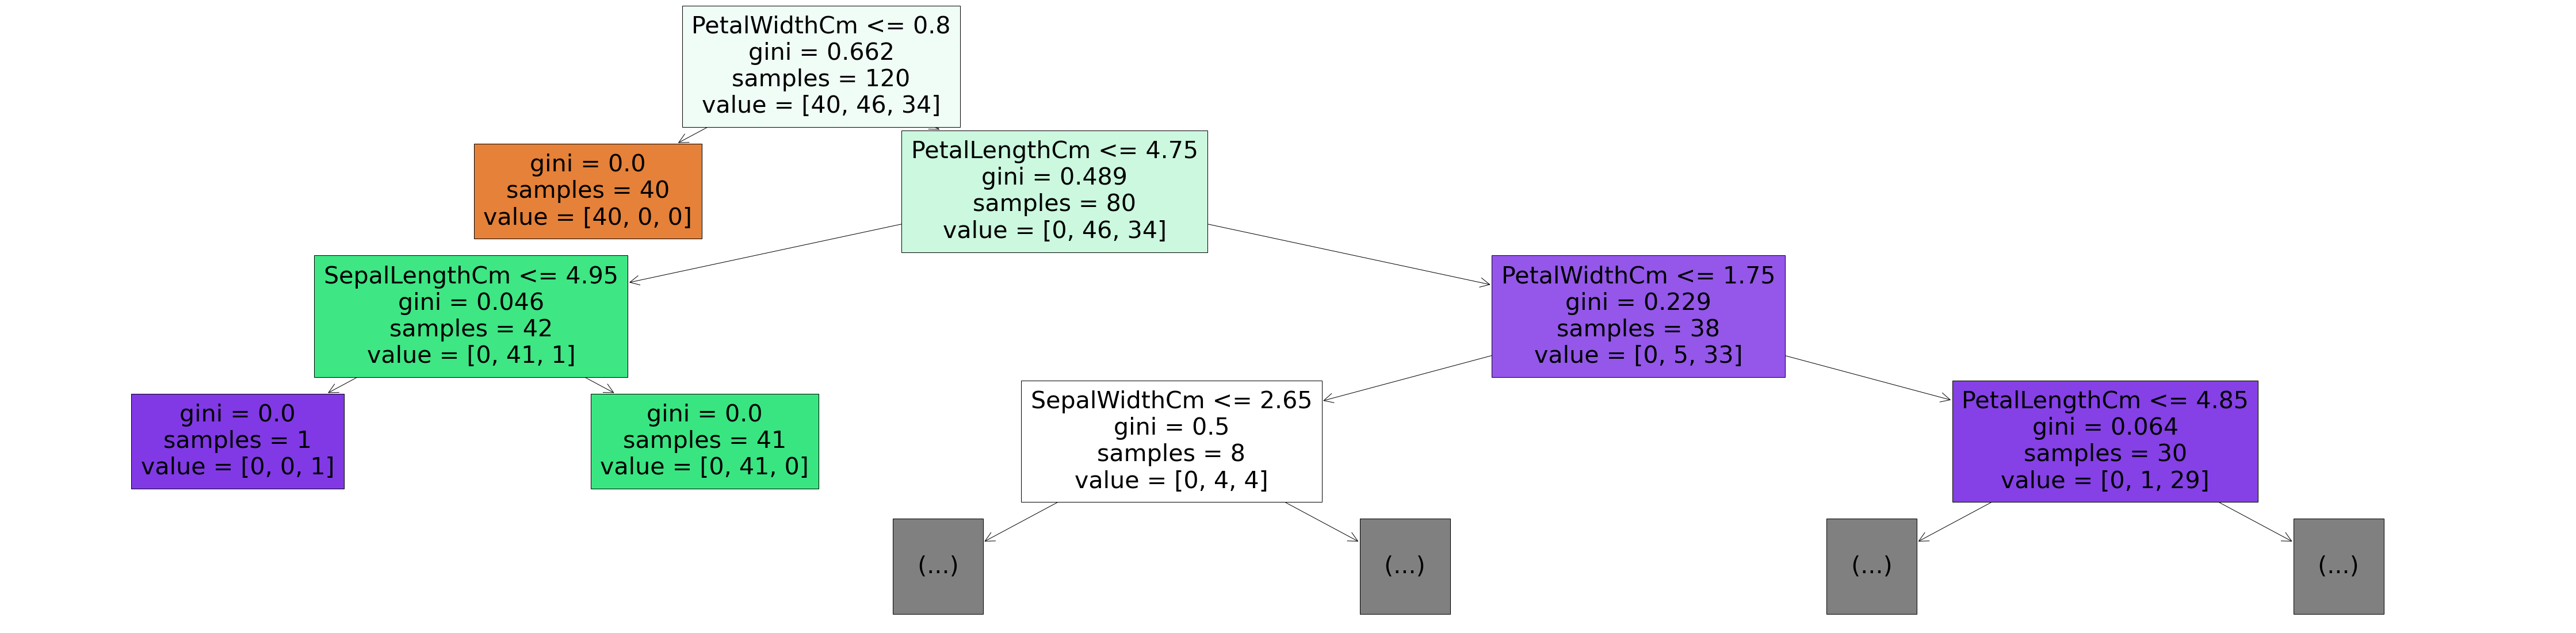

In [51]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, max_depth=3, filled=True);

Now we can calucate the accuracy of our model 

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds = model.predict(x_train)

In [53]:
train_preds

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginic

In [54]:
accuracy_score(train_preds,y_train)

1.0

We can see that the accuracy of our model for the training set is 100% but we can rely on it. So let's test with validation set

In [55]:
test_preds = model.predict(x_test)

In [56]:
accuracy_score(test_preds,y_test)

0.9333333333333333

Its seen that the accuracy of our model on the validation set is 96% which is very good

Now let's see the importance given by our model to each feature

In [57]:
importance_df = pd.DataFrame({
    'Importance':model.feature_importances_,
    'Field':x_train.columns
}).sort_values('Importance',ascending=False)

In [58]:
importance_df

,Importance,Field
3,0.542202,PetalWidthCm
2,0.382831,PetalLengthCm
1,0.050378,SepalWidthCm
0,0.024589,SepalLengthCm


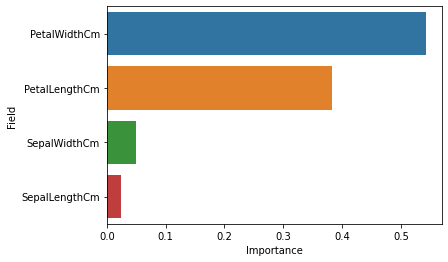

In [59]:
import seaborn as sns
sns.barplot(data=importance_df,x='Importance',y='Field')

# Making Predictions with indvidual inputs

In [60]:
input_df = {
    'SepalLengthCm':5.79,
    'SepalWidthCm': 3.03,
    'PetalLengthCm': 3.67,
    'PetalWidthCm' : 1.44       
}

In [61]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    X_input = input_df
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [62]:
predict_input(model,input_df)

('Iris-versicolor', 1.0)

Our model predicts Iris-versicolor for the given inputs and its 100% accurate

Thankyou 